# **Denoising and Sharpening of image**

<hr />

In this assignment, you are going to learn about correlation, finding edges through filter, salt and paper noise, denoising and sharpening of the image.



**[TOTAL POINTS: 15]**


__Dataset Used:__

- Description:  Frog red blood cells magnified 1000 times. 

- Date: 29 December 2014 

- Source: [Red blood cell](http://www.3dham.com/animal/bloodcompare.html )

- Author: John Alan Elson

- This file is licensed under the [Creative Commons Attribution-Share Alike 3.0 Unported](https://creativecommons.org/licenses/by-sa/3.0/deed.en) license. 

- Downloaded from: [Wikimedia](https://commons.wikimedia.org/wiki/File:Frogrbc1000x.jpg)


## **Importing the necessary libraries**


*   [OpenCV](): Computer vision library

*   [numpy](https://numpy.org/doc/): Library for N-dimensional array.

*   [matplotlib](https://matplotlib.org/): Library containing packages for visualisation.

*   [scipy](): Scientific library to find correlation

*   [random](): Mathematical library to generate random values. 

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import random

## **Loading image**

Let us first downlad image and load it using openCV.

In [23]:
!wget --no-check-certificate 'https://storage.googleapis.com/codehub-data/3-A-3-1-cell.PNG' -O cell.PNG

--2023-03-29 02:29:31--  https://storage.googleapis.com/codehub-data/3-A-3-1-cell.PNG
Resolving storage.googleapis.com... 142.250.206.176, 142.250.194.144, 142.250.194.208, ...
Connecting to storage.googleapis.com|142.250.206.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154125 (151K) [image/png]
Saving to: 'cell.PNG'

cell.PNG            100%[===================>] 150.51K  --.-KB/s    in 0.1s    

2023-03-29 02:29:31 (1.01 MB/s) - 'cell.PNG' saved [154125/154125]



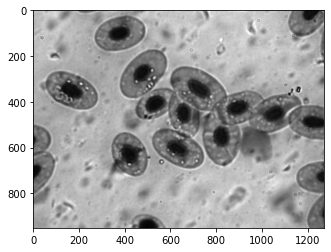

In [24]:
#loading in grayscale form
img = cv2.imread('cell.PNG',0)
plt.imshow(img,cmap='gray')

## **Correlation**

In this section we will use some portion of the image and try to correlation between the portion and the whole image. First we will extract the pattern from the image.

/var/folders/lr/7vn_mr390vddlsgfkdpps0kr0000gn/T/ipykernel_1479/3931147059.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


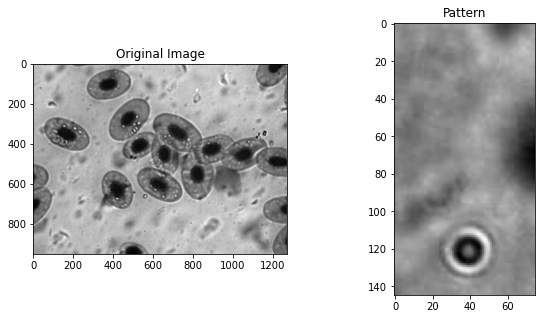

In [25]:
#Extracting portion from the image
pattern = img[0:145, 0:75]
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.imshow(img, cmap='gray',)
ax1.set_title("Original Image")
ax2 = fig.add_subplot(122)
ax2.imshow(pattern, cmap='gray', label="Repeated Pattern")
ax2.set_title("Pattern")

fig.show()

## **Exercise 1: Finding correlation**

---

<b><div style="text-align: right">[POINTS: 02]</div></b>

In this exercise, you are going to find 2D correlation between `pattern` and `img` file using signal class of scipy module. Use `symm` boundary and `full` mode in the parameter.

In [26]:
### Ex-1-Task-1

corr = None
### BEGIN SOLUTION
# your code here


img = cv2.imread('cell.PNG', cv2.IMREAD_GRAYSCALE)
pattern = img[0:145, 0:75]
img_gray = np.array(img)
pattern_gray = np.array(pattern)
corr = signal.correlate2d(img_gray, pattern_gray, mode='full', boundary='symm')


### END SOLUTION

In [27]:
assert corr is not None
### INTENTIONALLY LEFT BLANK ###

Now let us visualize where the algorithm finds the matching pattern within the image. Red dot in the original image shows the location of pattern.

/var/folders/lr/7vn_mr390vddlsgfkdpps0kr0000gn/T/ipykernel_1479/1077573014.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


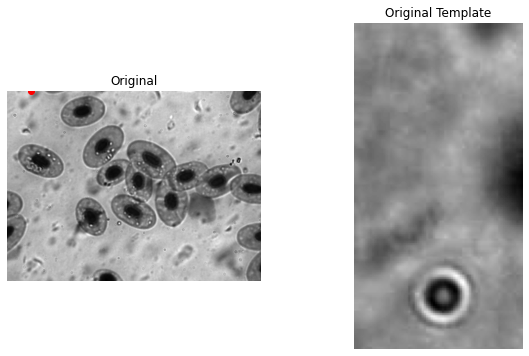

In [28]:
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match
fig, (ax_orig, ax_template) = plt.subplots(1, 2, figsize=(10, 6))
ax_orig.imshow(img, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(pattern, cmap='gray')
ax_template.set_title('Original Template')
ax_template.set_axis_off()

ax_orig.plot(x, y, 'ro')
fig.show()

## **Exercise 2: Finding edges through kernel**

---

<b><div style="text-align: right">[POINTS: 04]</div></b>

In this exercise, you are going to use edge detecting kernel provided in the reading material to find the edges in the cell image. You will use the kernel in the `filter2D` function of openCV library.

In [29]:
### Ex-2-Task-1
edge = None
### BEGIN SOLUTION
# your code here

img = cv2.imread('cell.png', cv2.IMREAD_GRAYSCALE)
kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edge = cv2.filter2D(img, -1, kernel)
### END SOLUTION

In [11]:
assert edge is not None
### INTENTIONALLY LEFT BLANK ###

Now let us visalize the original image and the edge detecting image.

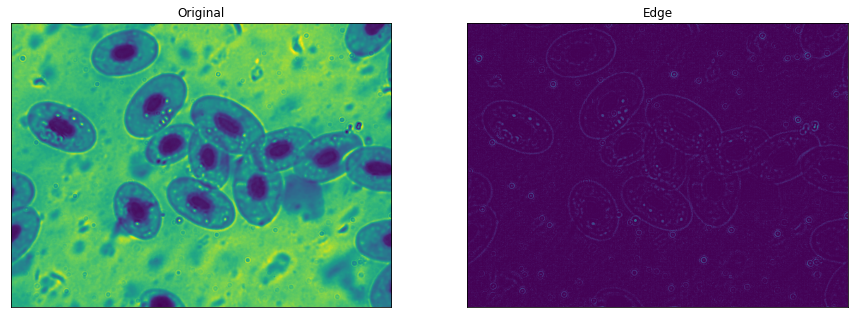

In [30]:
fig = plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edge),plt.title('Edge')
plt.xticks([]), plt.yticks([])
plt.show()

## **Exercise 3: Adding salt and pepper noise**

---

<b><div style="text-align: right">[POINTS: 05]</div></b>

In this exercise, you are going to write code such that the function returns image with salt and pepper noise. The function takes image and prob as parameter. 'prob' basically defines the probabilty of salt and pepper noise.

In [31]:
### Ex-3-Task-1
def salt_and_pepper_noise_image(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    
    ### BEGIN SOLUTION
    # your code here
    output = np.copy(image)
    height, width = image.shape[:2]
    num_pixels = height * width
    num_salt = np.ceil(prob * num_pixels * 0.5)
    num_pepper = np.ceil(prob * num_pixels * 0.5)

    
    salt_x = np.random.randint(0, width-1, int(num_salt))
    salt_y = np.random.randint(0, height-1, int(num_salt))
    output[salt_y, salt_x] = 255

 
    pepper_x = np.random.randint(0, width-1, int(num_pepper))
    pepper_y = np.random.randint(0, height-1, int(num_pepper))
    output[pepper_y, pepper_x] = 0
    ### END SOLUTION
    return output


In [32]:
### INTENTIONALLY LEFT BLANK ###

Now let us see the effect of addition of salt and pepper noise onto the image.

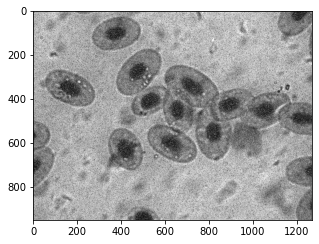

In [33]:
image_with_s_p_noise = salt_and_pepper_noise_image(img,prob=0.2)
plt.figure (figsize=(5,5))
plt.imshow(image_with_s_p_noise,cmap='gray')

## **Exercise 4: Removal of salt and pepper noise**

---

<b><div style="text-align: right">[POINTS: 04]</div></b>

In this exercise, you are going to use both gaussian blur and median blur to remove the noise on the image and see which one does better. Use sigmaX and sigmaY as $0.8$ value, kernel of $(5,5)$ and for median blur use kernel of size $5$.

In [37]:
### Ex-4-Task-1
gblurr2 = None
mblurr2 = None
### BEGIN SOLUTION
# your code here
gblurr2 = cv2.GaussianBlur(img, (5,5), 0.8, 0.8)
mblurr2 = cv2.medianBlur(img, 5)
### END SOLUTION

In [20]:
### INTENTIONALLY LEFT BLANK ###

Let us visualize the effect of gaussian blur and motion blur.

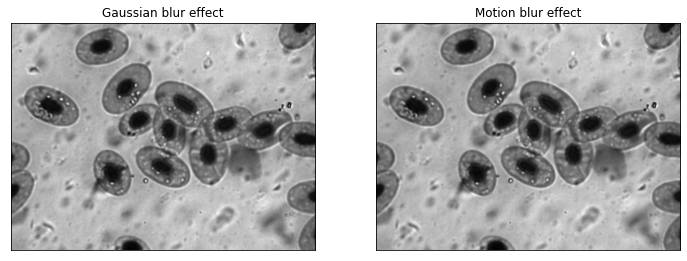

In [38]:
fig = plt.figure(figsize=(12, 12))
plt.subplot(121),plt.imshow(gblurr2, cmap='gray'),plt.title('Gaussian blur effect')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(mblurr2, cmap='gray'),plt.title('Motion blur effect')
plt.xticks([]), plt.yticks([])
plt.show()